# Load packages and data

Look into datra **without** filtering by mean speed first:

In [11]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,DateTimeStart,DateTimeEnd,StartLat,EndLat,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,
2019-08-08 03:00:12,219745000,Fishing,142,0.000940,2019-08-08 03:00:12.000000000,2019-08-09 02:30:12.000000000,57.718588,57.718568,10.597280,10.597231,2019-08-08 14:45:12.000000000,8,Thursday,8,84600,Fishing
2019-08-01 12:22:00,219941000,Fishing,100,2.196948,2019-08-01 12:22:00.000000000,2019-08-02 04:52:00.000000000,56.887229,56.699035,7.248279,8.218818,2019-08-01 20:37:00.000000000,8,Thursday,1,59400,Fishing


In [12]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 32483
Number of AIS message updates: 4131362
Number of unique MMSIs: 652

Number of unique MMSIs by ShipType
Fishing    652
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    1.487042
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    32483
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    32483.000000
mean       127.185358
std         27.495273
min         25.000000
25%        127.000000
50%        140.000000
75%        143.000000
max        144.000000
Name: TrackLength, dtype: float64



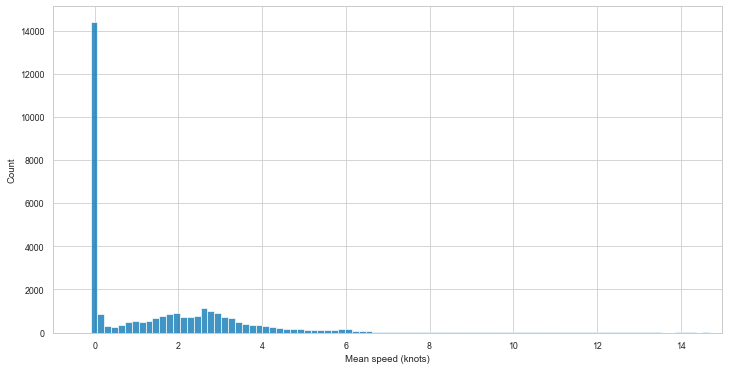

In [13]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

Look into data **after** applying a filter by mean speed (Min Speed = 0.2 Knots):

In [14]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_02_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-08-29 16:59:59,226334000,Fishing,26,9.989764,128.835278,2019-08-29 16:59:59.000000000,2019-08-29 21:09:59.000000000,57.336641,57.582633,57.118085,8.181796,7.621878,8.593285,2019-08-29 19:04:59.000000000,8,Thursday,29,15000,Fishing
2019-06-06 18:43:50,220099000,Fishing,108,2.735752,175.258483,2019-06-06 18:43:50.000000000,2019-06-07 12:33:50.000000000,56.939296,57.003608,56.885077,11.785911,11.810931,11.718028,2019-06-07 03:38:50.000000768,6,Thursday,6,64200,Fishing


In [15]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 16793
Number of AIS message updates: 1516758
Number of unique MMSIs: 629

Number of unique MMSIs by ShipType
Fishing    629
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    3.995562
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    16793
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    16793.000000
mean        90.320848
std         35.656610
min         25.000000
25%         62.000000
50%         93.000000
75%        123.000000
max        144.000000
Name: TrackLength, dtype: float64



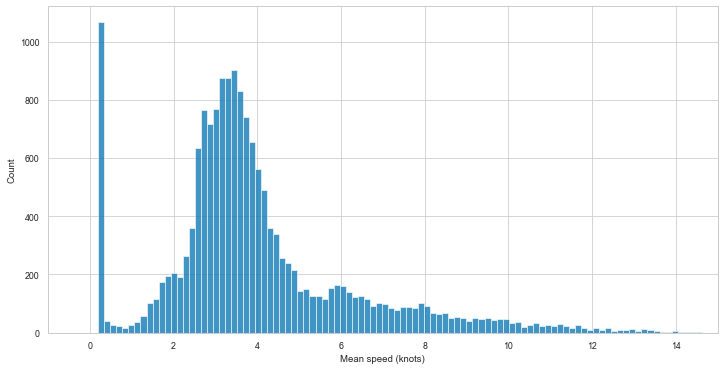

In [16]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])

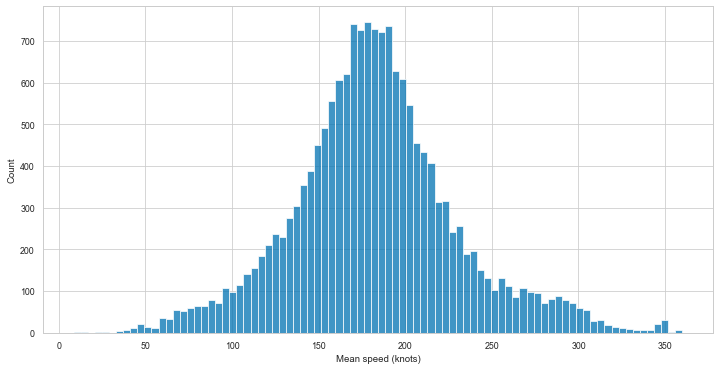

In [17]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanCourse", xlabel="Mean speed (knots)")

Look into data **after** applying a filter by mean speed (Min Speed = 0.1 Knots):

In [8]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryTrajectories import SummaryTrajectories
import matplotlib.pyplot as plt
import pandas as pd

# Use the SummaryTrajectories class
fig_size = (12, 6)
summary_file = "RegionSkagen_01062019_30092019_Fish_14400_86400_600_01_trajectories_summary.csv"
summary_trajectories = SummaryTrajectories(summary_file, save_figures=True, plot_figures=True,
                                           fig_size=fig_size, date="DateTimeStart")
df = summary_trajectories.df
df["Track length (sec)"] = pd.to_datetime(df["DateTimeEnd"]) - pd.to_datetime(df["DateTimeStart"])
df["Track length (sec)"] = df["Track length (sec)"].dt.total_seconds().astype(int)
df["Ship type"] = df["ShipType"] 
df.sample(n=2)

,MMSI,ShipType,TrackLength,MeanSpeed,MeanCourse,DateTimeStart,DateTimeEnd,MeanLat,StartLat,EndLat,MeanLon,StartLon,EndLon,DateTimeMean,Month,Weekday Name,Day of Month,Track length (sec),Ship type
DateTime,,,,,,,,,,,,,,,,,,,
2019-06-16 12:20:33,219948000,Fishing,93,4.100939,222.938946,2019-06-16 12:20:33.000000000,2019-06-17 03:40:33.000000000,58.421325,58.558559,58.584591,10.852813,10.773881,10.566994,2019-06-16 20:00:32.999999744,6,Sunday,16,55200,Fishing
2019-09-09 17:18:40,220088000,Fishing,139,2.965887,147.636619,2019-09-09 17:18:40.000000000,2019-09-10 16:18:40.000000000,57.823904,57.860171,57.806825,9.929158,9.178054,9.921929,2019-09-10 04:48:40.000000000,9,Monday,9,82800,Fishing


In [9]:
# Basic data exploration
summary_trajectories.basic_statistics(resample_frequency=60)

Number of Trajectories: 24547
Number of AIS message updates: 2381079
Number of unique MMSIs: 641

Number of unique MMSIs by ShipType
Fishing    641
Name: MMSI, dtype: int64

Mean speed by ShipType
Fishing    2.531765
Name: MeanSpeed, dtype: float64

Number of trajectories by ShipType
Fishing    24547
Name: ShipType, dtype: int64

Summary statistics for track length in minutes: 
count    24547.000000
mean        97.000815
std         36.831599
min         25.000000
25%         68.000000
50%        105.000000
75%        131.000000
max        144.000000
Name: TrackLength, dtype: float64



**STILL A LARGE SPIKE IN BEGINNING**

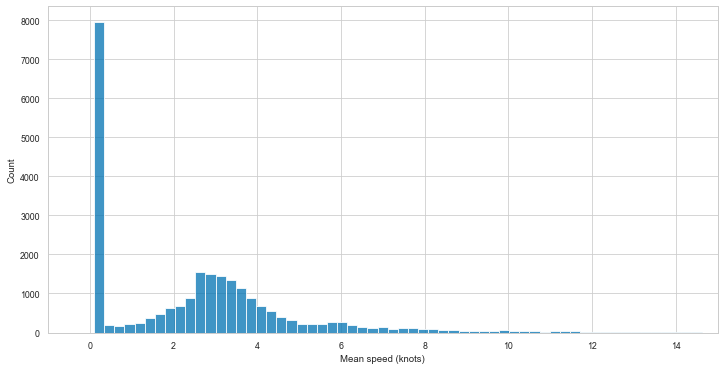

In [10]:
# Plot the mean speed histogram for each ship type
df_hist = df.reset_index()
summary_trajectories.hist_bar_plot(df_hist, "Histogram", "MeanSpeed", xlabel="Mean speed (knots)", xlim=[-1, 15])